In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report


KNN Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Linear Regression MSE: 0.03866591237825787


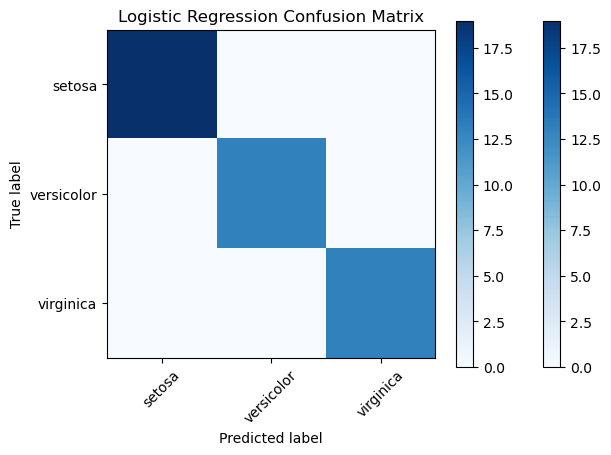

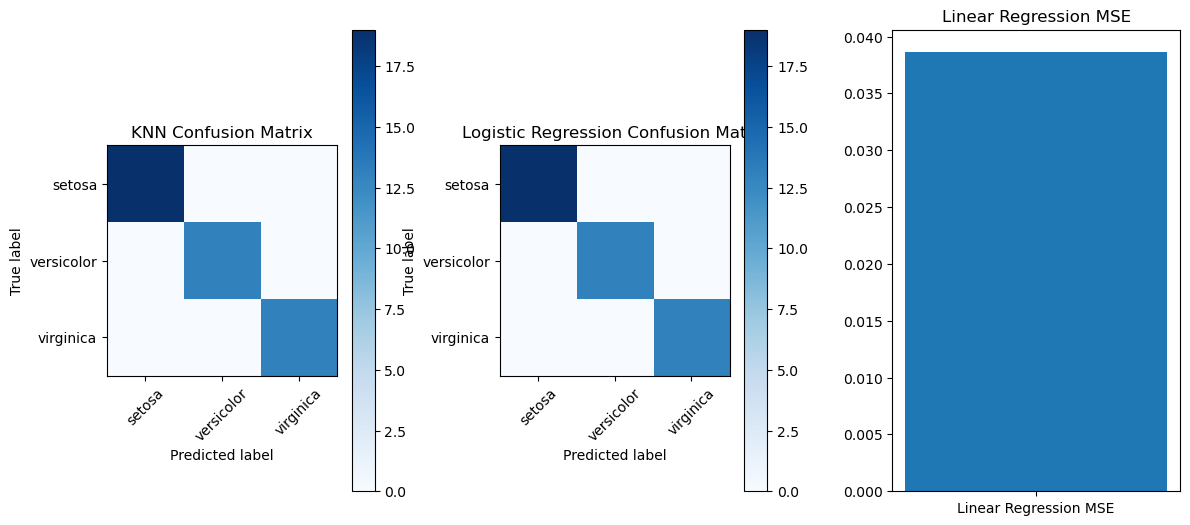

In [2]:

# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.target_names))
    plt.xticks(tick_marks, data.target_names, rotation=45)
    plt.yticks(tick_marks, data.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")
plot_confusion_matrix(knn_cm, title='KNN Confusion Matrix')

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
plot_confusion_matrix(log_reg_cm, title='Logistic Regression Confusion Matrix')

# Linear Regression (for regression tasks)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
print(f"Linear Regression MSE: {lin_reg_mse}")

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plot_confusion_matrix(knn_cm, title='KNN Confusion Matrix')

plt.subplot(1, 3, 2)
plot_confusion_matrix(log_reg_cm, title='Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 3)
plt.bar(['Linear Regression MSE'], [lin_reg_mse])
plt.title('Linear Regression MSE')
plt.show()